## Basic Pandas

Introduces the concept of a `DataFrame` in Python. If you're familiar with R, it's pretty much the same idea! Useful cheat sheet [here](https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.59HV6BY)

The main purpose of Pandas is to allow easy manipulation of data in tabular form. Perhaps the most important idea that makes Pandas great for data science, is that it will always preserve **alignment** between data and labels.

In [1]:
import pandas as pd
import numpy as np
import glob 

The most common data structure in Pandas is the `DataFrame`. A 2D structure that can hold various types of Python objects indexed by an `index` array (or multiple `index` arrays). Columns are usually labelled as well using strings.

An easy way to think about a `DataFrame` is if you imagine it as an Excel spreadsheet.

Pandas also reads files from disk in tabular form ([here](http://pandas.pydata.org/pandas-docs/version/0.20/io.html)'s a list of all the formats that it can read and write). A very common one is CSV, so let's load one!

In [2]:
df = pd.read_csv("../data/shankle.csv")
df.head()

Facies Formation Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       2     A1 SH   SHANKLE  2774.5  98.36      0.642      -0.1  18.685   
1       2     A1 SH   SHANKLE  2775.0  97.57      0.631       7.9  16.745   
2       2     A1 SH   SHANKLE  2775.5  98.41      0.615      12.8  14.105   
3       2     A1 SH   SHANKLE  2776.0  85.92      0.597      13.0  13.385   
4       2     A1 SH   SHANKLE  2776.5  83.16      0.592      12.3  13.345   

    PE  NM_M  RELPOS  
0  2.9     1   1.000  
1  3.2     1   0.984  
2  3.2     1   0.968  
3  3.4     1   0.952  
4  3.4     1   0.935

In [3]:
ls ../data/*.csv

../data/churchmanbible.csv  ../data/recruitf9.csv
../data/crosshcattle.csv    ../data/shankle.csv
../data/lukegu.csv          ../data/shrimplin.csv
../data/newby.csv           ../data/training_DataFrame_processed.csv
../data/nolan.csv


In [4]:
glob.glob('../data/*.csv')

['../data/shrimplin.csv',
 '../data/nolan.csv',
 '../data/newby.csv',
 '../data/shankle.csv',
 '../data/churchmanbible.csv',
 '../data/crosshcattle.csv',
 '../data/training_DataFrame_processed.csv',
 '../data/lukegu.csv',
 '../data/recruitf9.csv']

In [5]:
wells = []
for well in glob.glob('../data/*.csv'):
    wells.append(pd.read_csv(well))

`wells` contains 8 `DataFrame` objects. We can use `pandas` to concatenate them into a single `DataFrame`

In [6]:
df = pd.concat(wells)

/home/castaned/anaconda3/envs/geo_course/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


 - Create a new column called "ILD" and store in it the value of 10 to the power of the values in column "ILD_log10".

 - How many different facies are part of the `DataFrame`?.

In [7]:
df['ILD'] = 10**df["ILD_log10"]

In [8]:
df.groupby('Facies').size()

Facies
1     259
2     738
3    1230
4     184
5     217
6     924
7      98
8     498
9     322
dtype: int64

# Inspecting the `DataFrame`

Using the `DataFrame` with well log information loaded before, we can make a summary using the `describe()` method of the `DataFrame` object

In [9]:
df.describe()

DeltaPHI        Depth       Facies           GR          ILD  \
count  4470.000000  4470.000000  4470.000000  4470.000000  4470.000000   
mean      3.385394  2883.099329     4.554362    66.172264     5.252842   
std       5.488996   128.121041     2.409809    30.286804     3.204392   
min     -21.832000  2573.500000     1.000000    13.250000     0.942000   
25%       0.960000  2801.500000     3.000000    45.875000     3.148811   
50%       3.300000  2901.500000     4.000000    66.275000     4.243098   
75%       6.500000  2984.000000     6.000000    80.082500     6.652732   
max      18.600000  3122.500000     9.000000   361.150000    30.199517   

         ILD_log10         NM_M           PE        PHIND       RELPOS  \
count  4470.000000  4470.000000  4470.000000  4470.000000  4470.000000   
mean      0.652158     1.502908     3.752673    13.831535     0.520681   
std       0.242162     0.500047     0.932518     8.216492     0.290101   
min      -0.025949     1.000000     0.200000     0.550000     0.010000   
25%       0.498147     1.000000     3.124000     8.231000     0.265000   
50%       0.627683     2.000000     3.600000    12.250000     0.531000   
75%       0.823000     2.000000     4.390250    17.204500     0.771750   
max       1.480000     2.000000     8.094000    84.400000     1.000000   

              RHOB   Unnamed: 0  
count  1238.000000  1238.000000  
mean   2200.824004   228.254443  
std     329.701935   137.178029  
min     238.155172     0.000000  
25%    2072.978080   102.250000  
50%    2296.495505   230.500000  
75%    2434.072507   346.000000  
max    2651.987884   497.000000

In [10]:
df = df.dropna()

## Adding more data to the `DataFrame`

We'd like to augment the DataFrame with some new data, based on some of the existing data.

In [11]:
def calc_phi_rhob(phind, deltaphi):
    """
    Compute phi_RHOB from phi_ND and Delta_phi.
    """
    return 2 * (phind/100) / (1 - deltaphi/100) - deltaphi/100

In [12]:
def calc_rhob(phi_rhob, rho_matrix=2650.0, rho_fluid=1000.0):
    """
    Returns density porosity log.
    
    Some typical values for rho_matrix:
      Sandstone:  2650 kg/m^3
      Limestone:  2710 kg/m^3
      Dolomite:   2880 kg/m^3
      Anyhydrite: 2980 kg/m^3
      Salt:       2030 kg/m^3

    Some typical values for rho_fluid:
      Fresh water: 1000 kg/m^3
      Salt water:  1100 kg/m^3
      Heavy oil:   1000 kg/m^3
      Light oil:    800 kg/m^3
      LNG:          650 kg/m^3
    
    See wiki.aapg.org/Density-neutron_log_porosity
    """
    return rho_matrix * (1 - phi_rhob) + rho_fluid * phi_rhob

In [13]:
phi_rhob = calc_phi_rhob(df.PHIND, df.DeltaPHI)
df['RHOB'] = calc_rhob(phi_rhob)

In [14]:
df.describe()

DeltaPHI        Depth       Facies           GR          ILD  \
count  1238.000000  1238.000000  1238.000000  1238.000000  1238.000000   
mean      2.930491  2902.091276     4.899838    66.267538     5.569106   
std       6.094834   118.220963     2.105845    28.762935     3.462673   
min     -19.900000  2605.000000     3.000000    14.840000     0.970510   
25%       0.400000  2821.500000     3.000000    43.515250     3.258367   
50%       2.741000  2929.750000     6.000000    68.155500     4.385307   
75%       6.600000  2993.000000     6.000000    81.042500     7.400345   
max      18.500000  3116.000000     9.000000   305.870000    30.199517   

         ILD_log10         NM_M           PE        PHIND       RELPOS  \
count  1238.000000  1238.000000  1238.000000  1238.000000  1238.000000   
mean      0.676799     1.514540     3.824882    14.740885     0.521709   
std       0.241352     0.499991     1.018220     9.377314     0.298681   
min      -0.013000     1.000000     0.200000     2.300000     0.010000   
25%       0.513000     1.000000     3.200000     7.950000     0.242250   
50%       0.642000     2.000000     3.700000    12.762500     0.544000   
75%       0.869250     2.000000     4.500000    18.684750     0.778750   
max       1.480000     2.000000     8.094000    75.500000     1.000000   

              RHOB   Unnamed: 0  
count  1238.000000  1238.000000  
mean   2200.824004   228.254443  
std     329.701935   137.178029  
min     238.155172     0.000000  
25%    2072.978080   102.250000  
50%    2296.495505   230.500000  
75%    2434.072507   346.000000  
max    2651.987884   497.000000

We can define a Python dictionary to relate facies with the integer label on the `DataFrame`

In [15]:
facies_dict = {1:'sandstone', 2:'c_siltstone', 3:'f_siltstone', 4:'marine_silt_shale',
               5:'mudstone', 6:'wackestone', 7:'dolomite', 8:'packstone', 9:'bafflestone'}

Let's add a new column with the name version of the facies

In [16]:
df["s_Facies"] = [facies_dict.get(x, "Unknown") for x in df.Facies]

In [17]:
df.head(20)

DeltaPHI   Depth  Facies Formation     GR       ILD  ILD_log10  NM_M   PE  \
0        9.9  2793.0       3     A1 SH  77.45  4.613176      0.664     1  4.6   
1       14.2  2793.5       3     A1 SH  78.26  4.581419      0.661     1  4.1   
2       14.8  2794.0       3     A1 SH  79.05  4.549881      0.658     1  3.6   
3       13.9  2794.5       3     A1 SH  86.10  4.518559      0.655     1  3.5   
4       13.5  2795.0       3     A1 SH  74.58  4.436086      0.647     1  3.4   
5       14.0  2795.5       3     A1 SH  73.97  4.325138      0.636     1  3.6   
6       15.6  2796.0       3     A1 SH  73.72  4.265795      0.630     1  3.7   
7       16.5  2796.5       3     A1 SH  75.65  4.216965      0.625     1  3.5   
8       16.2  2797.0       3     A1 SH  73.79  4.207266      0.624     1  3.4   
9       16.9  2797.5       3     A1 SH  76.89  4.120975      0.615     1  3.5   
10      14.8  2798.0       3     A1 SH  76.11  3.981072      0.600     1  3.6   
11      13.3  2798.5       3     A1 SH  74.95  3.828247      0.583     1  3.7   
12      11.3  2799.0       3     A1 SH  71.87  3.639150      0.561     1  3.5   
13      13.3  2799.5       3     A1 SH  83.42  3.443499      0.537     1  3.4   
14       5.8  2805.5       3     A1 SH  69.48  2.259436      0.354     1  3.0   
15       5.2  2806.0       3     A1 SH  76.37  2.259436      0.354     1  3.0   
16       9.9  2809.5       3     A1 SH  54.29  2.951209      0.470     1  3.2   
17      11.1  2810.0       3     A1 SH  41.46  3.111716      0.493     1  3.4   
18      12.1  2810.5       3     A1 SH  50.93  3.341950      0.524     1  4.6   
19      11.3  2811.0       3     A1 SH  72.79  3.491403      0.543     1  4.1   

     PHIND  RELPOS         RHOB  Unnamed: 0  Well Name     s_Facies  
0   11.915   1.000  2376.951554         0.0  SHRIMPLIN  f_siltstone  
1   12.565   0.979  2401.030769         1.0  SHRIMPLIN  f_siltstone  
2   13.050   0.957  2388.742254         2.0  SHRIMPLIN  f_siltstone  
3   13.115   0.936  2376.684495         3.0  SHRIMPLIN  f_siltstone  
4   13.300   0.915  2365.351156         4.0  SHRIMPLIN  f_siltstone  
5   13.385   0.894  2367.389535         5.0  SHRIMPLIN  f_siltstone  
6   13.930   0.872  2362.743602         6.0  SHRIMPLIN  f_siltstone  
7   13.920   0.830  2372.118263         7.0  SHRIMPLIN  f_siltstone  
8   13.980   0.809  2366.774940         8.0  SHRIMPLIN  f_siltstone  
9   14.220   0.787  2364.156859         9.0  SHRIMPLIN  f_siltstone  
10  13.375   0.766  2376.154225        10.0  SHRIMPLIN  f_siltstone  
11  12.690   0.745  2386.439619        11.0  SHRIMPLIN  f_siltstone  
12  12.475   0.723  2372.329369        12.0  SHRIMPLIN  f_siltstone  
13  14.930   0.702  2301.180104        13.0  SHRIMPLIN  f_siltstone  
14  14.675   0.404  2231.607643        25.0  SHRIMPLIN  f_siltstone  
15  13.635   0.383  2261.163924        26.0  SHRIMPLIN  f_siltstone  
16   9.440   0.234  2467.600832        33.0  SHRIMPLIN  f_siltstone  
17   5.255   0.213  2638.082508        34.0  SHRIMPLIN  f_siltstone  
18   5.265   0.170  2651.987884        35.0  SHRIMPLIN  f_siltstone  
19  11.760   0.149  2398.930271        36.0  SHRIMPLIN  f_siltstone

## Visual exploration of the data

We can easily visualize the properties of each facies and how they compare using a `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

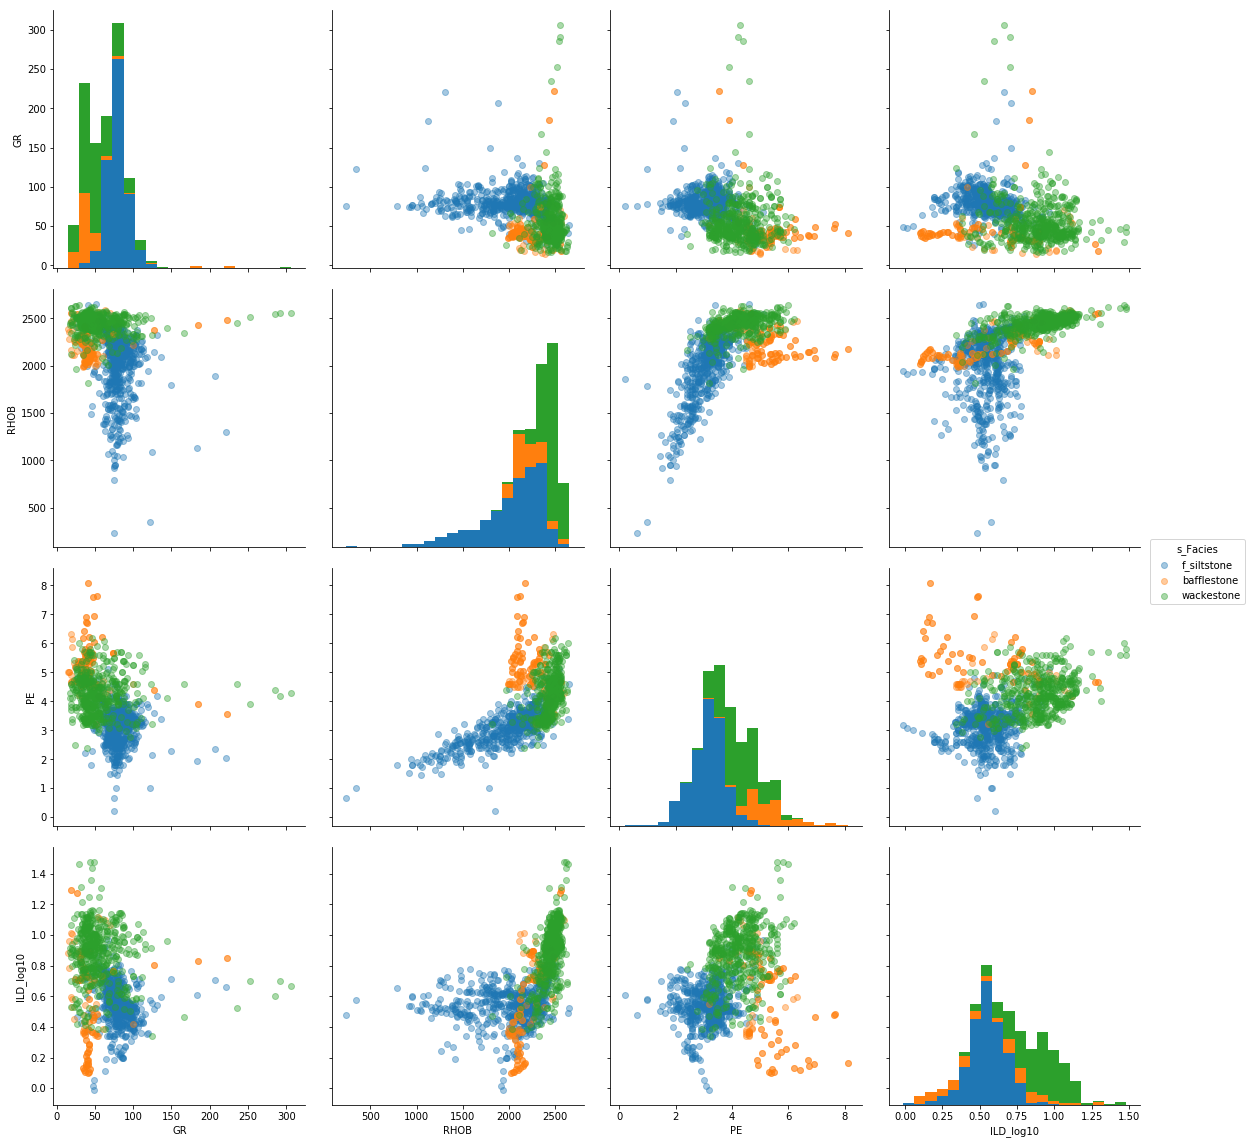

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.PairGrid(df, hue="s_Facies", vars=['GR','RHOB','PE','ILD_log10'], size=4)

g.map_upper(plt.scatter, alpha=0.4)  
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)  
g.add_legend()

It is very clear that it's hard to separate these facies in feature space. Let's just select a couple of facies and using Pandas, select the rows in the `DataFrame` that contain information about those facies 

In [19]:
selected = ['f_siltstone', 'bafflestone', 'wackestone']

dfs = pd.concat([df[df.s_Facies == x] for x in selected])

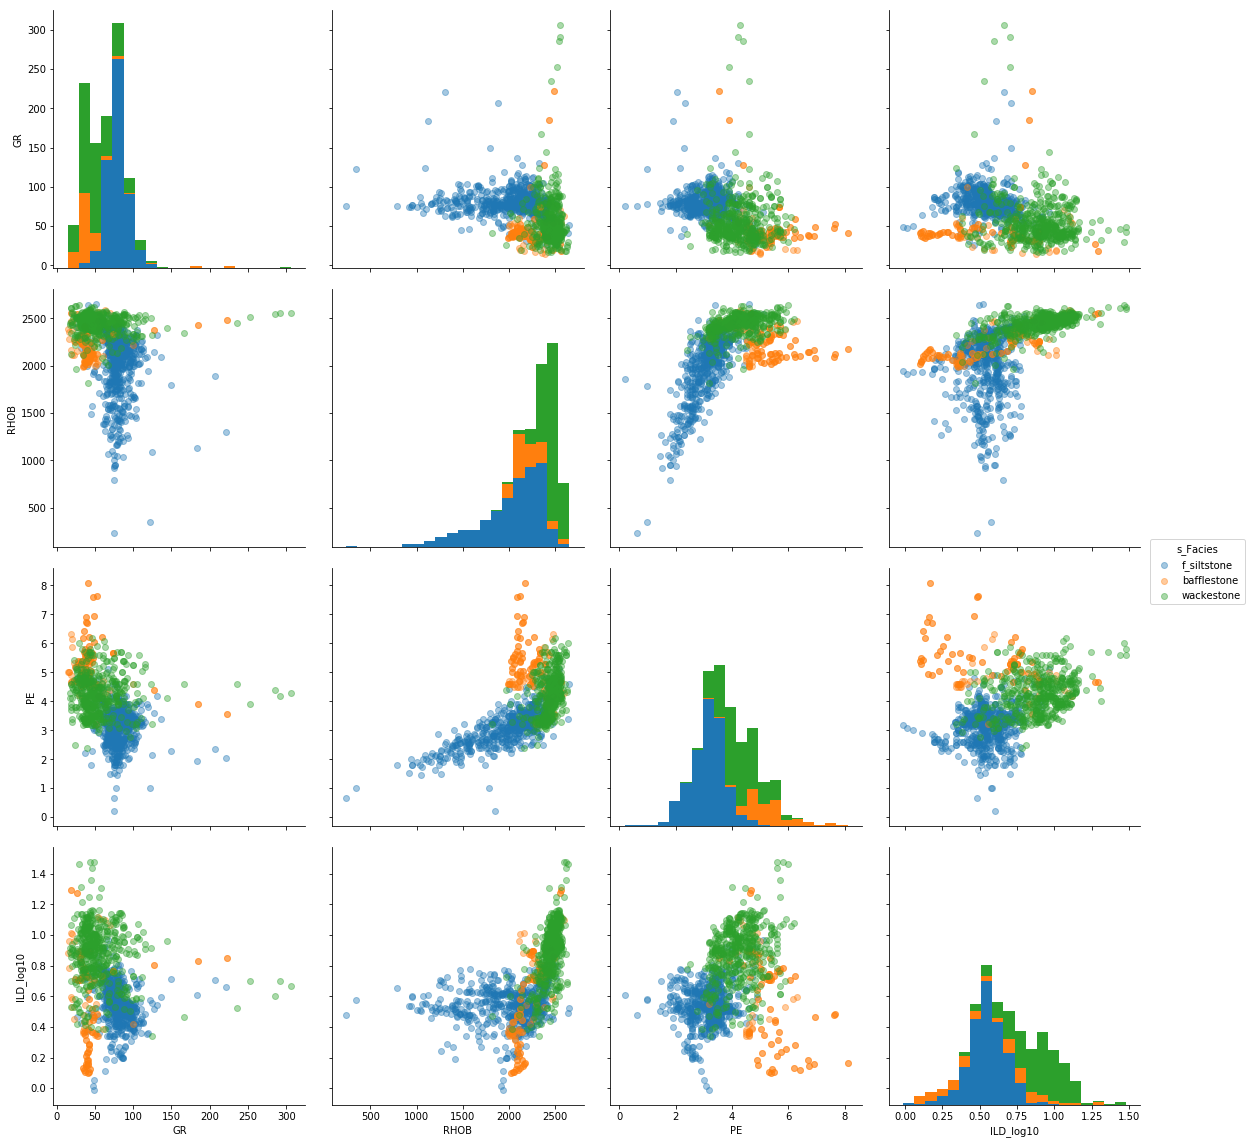

In [20]:
g = sns.PairGrid(dfs, hue="s_Facies", vars=['GR','RHOB','PE','ILD_log10'], size=4)  
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)  
g.add_legend()

Let's unpack that:

In [21]:
pd.concat([df[df.s_Facies == x] for x in selected])

DeltaPHI   Depth  Facies Formation      GR        ILD  ILD_log10  NM_M  \
0          9.9  2793.0       3     A1 SH   77.45   4.613176      0.664     1   
1         14.2  2793.5       3     A1 SH   78.26   4.581419      0.661     1   
2         14.8  2794.0       3     A1 SH   79.05   4.549881      0.658     1   
3         13.9  2794.5       3     A1 SH   86.10   4.518559      0.655     1   
4         13.5  2795.0       3     A1 SH   74.58   4.436086      0.647     1   
5         14.0  2795.5       3     A1 SH   73.97   4.325138      0.636     1   
6         15.6  2796.0       3     A1 SH   73.72   4.265795      0.630     1   
7         16.5  2796.5       3     A1 SH   75.65   4.216965      0.625     1   
8         16.2  2797.0       3     A1 SH   73.79   4.207266      0.624     1   
9         16.9  2797.5       3     A1 SH   76.89   4.120975      0.615     1   
10        14.8  2798.0       3     A1 SH   76.11   3.981072      0.600     1   
11        13.3  2798.5       3     A1 SH   74.95   3.828247      0.583     1   
12        11.3  2799.0       3     A1 SH   71.87   3.639150      0.561     1   
13        13.3  2799.5       3     A1 SH   83.42   3.443499      0.537     1   
14         5.8  2805.5       3     A1 SH   69.48   2.259436      0.354     1   
15         5.2  2806.0       3     A1 SH   76.37   2.259436      0.354     1   
16         9.9  2809.5       3     A1 SH   54.29   2.951209      0.470     1   
17        11.1  2810.0       3     A1 SH   41.46   3.111716      0.493     1   
18        12.1  2810.5       3     A1 SH   50.93   3.341950      0.524     1   
19        11.3  2811.0       3     A1 SH   72.79   3.491403      0.543     1   
20        14.1  2811.5       3     A1 SH   95.34   3.589219      0.555     1   
21        15.8  2812.0       3     A1 SH  102.35   3.614099      0.558     1   
22        15.5  2812.5       3     A1 SH   79.70   3.539973      0.549     1   
23        14.0  2813.0       3     A1 SH   66.69   3.388442      0.530     1   
24         1.8  2840.0       3     B1 SH  107.77   5.164164      0.713     1   
25         6.0  2840.5       3     B1 SH  110.87   4.852885      0.686     1   
26         8.6  2841.0       3     B1 SH  106.33   4.623810      0.665     1   
27         9.6  2841.5       3     B1 SH   87.85   4.365158      0.640     1   
28         9.0  2842.0       3     B1 SH   80.96   3.990249      0.601     1   
29         6.1  2847.0       3     B1 SH   84.46   3.061963      0.486     1   
...        ...     ...     ...       ...     ...        ...        ...   ...   
1208       9.1  2817.0       6      C LM   43.79   8.550667      0.932     2   
1209       8.4  2817.5       6      C LM   51.07   8.550667      0.932     2   
1210       5.7  2818.0       6      C LM   49.55   9.015711      0.955     2   
1211       3.5  2818.5       6      C LM   42.49   9.527962      0.979     2   
1212       3.5  2819.0       6      C LM   48.45  10.162487      1.007     2   
1213       3.9  2819.5       6      C LM   54.59  11.066238      1.044     2   
1214       3.5  2820.0       6      C LM   56.75  11.297959      1.053     2   
1215       2.8  2820.5       6      C LM   48.11  11.066238      1.044     2   
1216       2.3  2821.0       6      C LM   41.37  10.375284      1.016     2   
1217       1.8  2821.5       6      C LM   40.62   9.931160      0.997     2   
1218       1.7  2822.0       6      C LM   43.16   9.727472      0.988     2   
1219       2.6  2822.5       6      C LM   46.73   9.311079      0.969     2   
1220       3.7  2823.0       6      C LM   51.04   9.120108      0.960     2   
1221       3.6  2823.5       6      C LM   54.56   9.527962      0.979     2   
1222       3.4  2824.0       6      C LM   53.58  10.162487      1.007     2   
1223       2.5  2824.5       6      C LM   50.00  12.050359      1.081     2   
1224       0.7  2825.0       6      C LM   46.51  12.589254      1.100     2   
1225       0.6  2825.5       6      C LM   41.43  12.852867      1.109     2   
1226  

In [22]:
dfs.head()

DeltaPHI   Depth  Facies Formation     GR       ILD  ILD_log10  NM_M   PE  \
0       9.9  2793.0       3     A1 SH  77.45  4.613176      0.664     1  4.6   
1      14.2  2793.5       3     A1 SH  78.26  4.581419      0.661     1  4.1   
2      14.8  2794.0       3     A1 SH  79.05  4.549881      0.658     1  3.6   
3      13.9  2794.5       3     A1 SH  86.10  4.518559      0.655     1  3.5   
4      13.5  2795.0       3     A1 SH  74.58  4.436086      0.647     1  3.4   

    PHIND  RELPOS         RHOB  Unnamed: 0  Well Name     s_Facies  
0  11.915   1.000  2376.951554         0.0  SHRIMPLIN  f_siltstone  
1  12.565   0.979  2401.030769         1.0  SHRIMPLIN  f_siltstone  
2  13.050   0.957  2388.742254         2.0  SHRIMPLIN  f_siltstone  
3  13.115   0.936  2376.684495         3.0  SHRIMPLIN  f_siltstone  
4  13.300   0.915  2365.351156         4.0  SHRIMPLIN  f_siltstone

In [23]:
dfs.to_csv("../data/training_DataFrame_processed.csv")

# Exploring data beyond Matplotlib

A few other plotting libraries have emerged with the rise in popularity of data science that make use of JavaScript to add interactivity. Examples:
 - [Altair](https://altair-viz.github.io/index.html)
 - [Holoviews](http://holoviews.org/index.html)

## Altair
To install, activate `geocomp` and type:
- `pip install -U altair vega_datasets notebook vega`


In [24]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

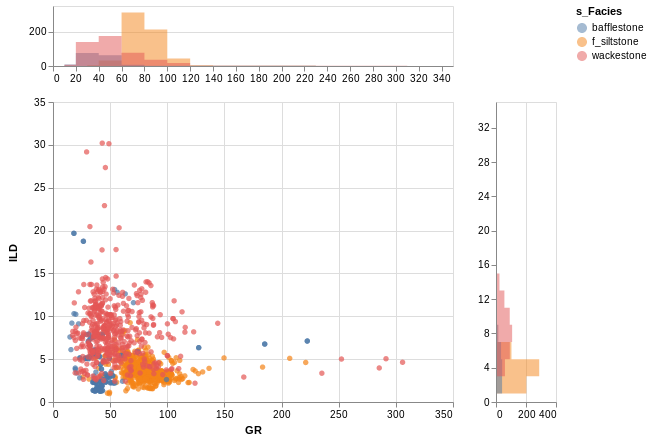

In [25]:
import altair as alt

xscale = alt.Scale(domain=(0, 350.0))
yscale = alt.Scale(domain=(0, 35))

area_args = {'opacity': .5, 'interpolate': 'step'}
blank_axis = alt.Axis(title='')

points = alt.Chart(dfs).mark_circle().encode(
    alt.X('GR', scale=xscale),
    alt.Y('ILD', scale=yscale),
    color='s_Facies',
)

top_hist = alt.Chart(dfs).mark_area(**area_args).encode(
    alt.X('GR:Q',
          # when using bins, the axis scale is set through
          # the bin extent, so we do not specify the scale here
          # (which would be ignored anyway)
          bin=alt.Bin(maxbins=20, extent=xscale.domain),
          stack=None,
          axis=blank_axis,
         ),
    alt.Y('count()', stack=None, axis=blank_axis),
    alt.Color('s_Facies:N'),
).properties(height=60)

right_hist = alt.Chart(dfs).mark_area(**area_args).encode(
    alt.Y('ILD:Q',
          bin=alt.Bin(maxbins=20, extent=yscale.domain),
          stack=None,
          axis=blank_axis,
         ),
    alt.X('count()', stack=None, axis=blank_axis),
    alt.Color('s_Facies:N'),
).properties(width=60)

top_hist & (points | right_hist)

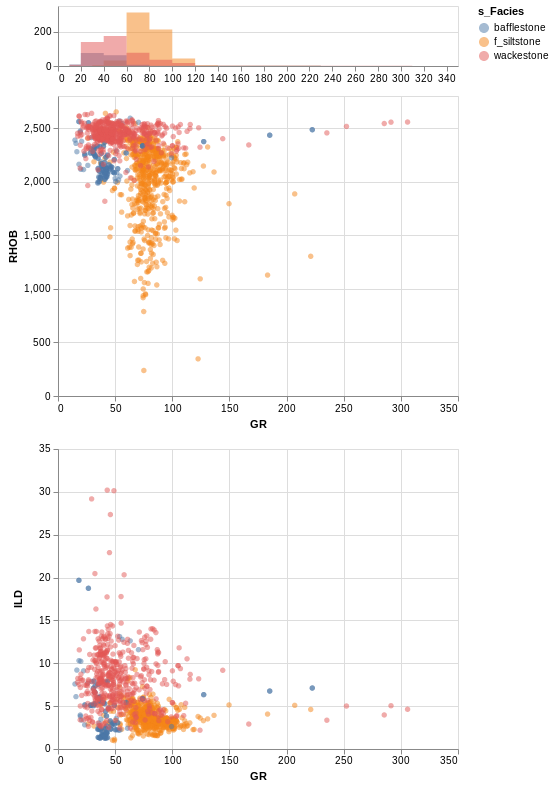

In [26]:
brush = alt.selection_interval(encodings=['x'])
color = alt.Color('s_Facies:N')
xscale = alt.Scale(domain=(0, 350.0))
yscale = alt.Scale(domain=(1.9, 4.55))

area_args = {'opacity': .5, 'interpolate': 'step'}
blank_axis = alt.Axis(title='')

c1 = alt.Chart(dfs).mark_circle(opacity=.5).encode(
    alt.X('GR', type='quantitative'),
    alt.Y('RHOB', type='quantitative'),
    color=alt.condition(brush, color, alt.value('lightgray')),
).add_selection(brush)

c2 = alt.Chart(dfs).mark_circle(opacity=.5).encode(
    alt.X('GR', type='quantitative'),
    alt.Y('ILD', type='quantitative'),
    color=alt.condition(brush, color, alt.value('lightgray')),
).add_selection(brush)

top_hist = alt.Chart(dfs).mark_area(**area_args).encode(
    alt.X('GR:Q',
          bin=alt.Bin(maxbins=30, extent=xscale.domain),
          stack=None,
          axis=blank_axis,
         ),
    alt.Y('count()', stack=None, axis=blank_axis),
    alt.Color('s_Facies:N'),
).transform_filter(brush).properties(height=60)

top_hist & c1 & c2

## Holoviews

To install, activate `geocomp` and type:
- `pip install "holoviews[recommended]"`

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
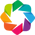

In [27]:
import holoviews as hv
hv.extension('bokeh')

In [28]:
from holoviews.operation import gridmatrix

ds = hv.Dataset(dfs[['GR','RHOB','PE','ILD_log10','s_Facies']])

In [29]:
%%opts Bivariate [bandwidth=0.5] (cmap=Cycle(values=['Blues', 'Reds', 'Oranges'])) Points (size=2 alpha=0.5)

grouped_by_facies = ds.groupby('s_Facies', container_type=hv.NdOverlay)
density_grid = gridmatrix(grouped_by_facies, diagonal_type=hv.Distribution, chart_type=hv.Bivariate)
point_grid = gridmatrix(grouped_by_facies, chart_type=hv.Points)

density_grid * point_grid

:GridMatrix   [X,Y]
   :Overlay
      .NdOverlay.I  :NdOverlay   [s_Facies]
         :Distribution   [RHOB]   (Density)
      .NdOverlay.II :NdOverlay   [s_Facies]
         :Histogram   [RHOB]   (RHOB_frequency)

<hr />

<p style="color:gray">©2017 Agile Geoscience. Licensed CC-BY.</p>